In [0]:
#я не торч, просто дунул
import torch

In [0]:
#воспроизводимость
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [0]:
#данные
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [0]:
X_train = MNIST_train.data
y_train = MNIST_train.targets
X_test = MNIST_test.data
y_test = MNIST_test.targets

In [0]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [0]:
X_train = X_train.float()
X_test = X_test.float()

In [0]:
print(X_train.shape, y_train.shape, sep='\n')

torch.Size([60000, 28, 28])
torch.Size([60000])


In [0]:
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])
X_train.shape

torch.Size([60000, 784])

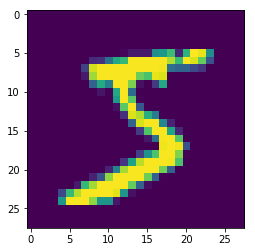

In [0]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :].reshape([28, 28]));

In [0]:
import numpy as np
from sklearn.metrics import accuracy_score

class MNISTNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons, n_epochs=5000, lr=0.001, batch_size=100):
    super(MNISTNet, self).__init__()
    self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)
    self.sm = torch.nn.Softmax(dim=1)
    
    self.n_epochs = n_epochs
    self.lr = lr
    self.batch_size = batch_size
  
  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x
  
  def train(self, x, y):
    self.loss_history_ = []
    self.accuracy_history_ = []
    
    optimizer = torch.optim.Adam(self.parameters(), self.lr)
    loss = torch.nn.CrossEntropyLoss() #принимает значения НЕ из Softmax (не вычисляется логарифм)
    
    for i in range(self.n_epochs):
      shuffled_indexes = np.random.permutation(x.shape[0])
      
      for start_index in range(0, x.shape[0], self.batch_size):
        x_batch = x[shuffled_indexes[start_index:start_index + self.batch_size], :]
        y_batch = y[shuffled_indexes[start_index:start_index + self.batch_size]]
        
        optimizer.zero_grad()
        y_output = self.forward(x_batch)
        loss_value = loss(y_output, y_batch)
        loss_value.backward()
        optimizer.step()
        
      if i % 10 == 0:
        self.loss_history_.append(loss(self.forward(x), y).detach().numpy())
        accuracy = accuracy_score(self.predict(x).detach().numpy(), y.detach().numpy())
        self.accuracy_history_.append(accuracy)
        print(accuracy)
        
    return self 

  def predict(self, x):
    return self.forward(x).argmax(dim=1)
  
  def predict_proba(self, x):
    return self.sm(self.forward(x))

In [0]:
mnist_net = MNISTNet(100, n_epochs=600, lr=.001)
mnist_net.train(X_train, y_train)

0.9027166666666666
0.9202833333333333
0.9206666666666666
0.9231333333333334
0.9237
0.9281666666666667
0.9227
0.9305333333333333
0.9316166666666666
0.9337666666666666
0.9357666666666666
0.9324333333333333


KeyboardInterrupt: ignored

In [0]:
#mnist_net.predict(X_test)
accuracy_score(mnist_net.predict(X_test), y_test)

0.9298